In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# 입법

In [2]:
import pandas as pd
import numpy as np
laws = pd.read_csv('./second_laws.csv')
laws

,CONTENT,INITIATION DATE,RELEVANT DEPARTMENT,CATEGORY
0,근로기준법 일부개정법률안,2019-08-01,고용노동부,일자리
1,담배사업법 일부개정법률안,2019-08-01,기획재정부,행정
2,원자력안전위원회의 설치 및 운영에 관한 법률 일부개정법률안,2019-08-01,원자력안전위원회,안전/환경
3,원자력안전법 일부개정법률안,2019-08-01,원자력안전위원회,안전/환경
4,관광진흥법 일부개정법률안,2019-08-01,문화체육관광부,문화/예술/체육/언론
...,...,...,...,...
17944,스토킹범죄의 처벌 등에 관한 법률 일부개정법률안,2022-05-06,법무부,정치개혁
17945,정부조직법 일부개정법률안,2022-05-06,행정안전부,행정
17946,국가유공자 등 예우 및 지원에 관한 법률 일부개정법률안,2022-05-06,국가보훈처,보건복지
17947,화물자동차 운수사업법 일부개정법률안,2022-05-06,국토교통부,교통/건축/국토


In [3]:
from datetime import datetime
laws['INITIATION DATE']=pd.to_datetime(laws['INITIATION DATE'])
laws.sort_values(by=['INITIATION DATE'],inplace=True)
laws.reset_index(drop=True,inplace=True)
laws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17949 entries, 0 to 17948
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CONTENT              17949 non-null  object        
 1   INITIATION DATE      17949 non-null  datetime64[ns]
 2   RELEVANT DEPARTMENT  17949 non-null  object        
 3   CATEGORY             17949 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 561.0+ KB


In [226]:
categoric = laws.groupby('CATEGORY').get_group('안전/환경')
categoric

,CONTENT,INITIATION DATE,RELEVANT DEPARTMENT,CATEGORY
4,수입식품안전관리 특별법 일부개정법률안,2019-08-01,식품의약품안전처,안전/환경
6,물환경보전법 일부개정법률안,2019-08-01,환경부,안전/환경
9,폐기물의 국가 간 이동 및 그 처리에 관한 법률 일부개정법률안,2019-08-01,환경부,안전/환경
12,원자력안전법 일부개정법률안,2019-08-01,원자력안전위원회,안전/환경
13,원자력안전위원회의 설치 및 운영에 관한 법률 일부개정법률안,2019-08-01,원자력안전위원회,안전/환경
...,...,...,...,...
17881,석면피해구제법 일부개정법률안,2022-04-28,환경부,안전/환경
17882,야생생물 보호 및 관리에 관한 법률 일부개정법률안,2022-04-28,환경부,안전/환경
17917,한국환경공단법 일부개정법률안,2022-05-04,환경부,안전/환경
17928,폐기물관리법 일부개정법률안,2022-05-04,환경부,안전/환경


In [227]:
work_l = categoric.groupby('INITIATION DATE')['CONTENT'].count()
work_l

INITIATION DATE
2019-08-01    5
2019-08-02    1
2019-08-05    2
2019-08-06    5
2019-08-08    2
             ..
2022-04-15    1
2022-04-27    1
2022-04-28    2
2022-05-04    2
2022-05-06    1
Name: CONTENT, Length: 444, dtype: int64

In [228]:
work_L = work_l.to_frame()
work_L.columns = ['work_l']
work_L = work_L.rename_axis('date_l').reset_index()
work_L

,date_l,work_l
0,2019-08-01,5
1,2019-08-02,1
2,2019-08-05,2
3,2019-08-06,5
4,2019-08-08,2
...,...,...
439,2022-04-15,1
440,2022-04-27,1
441,2022-04-28,2
442,2022-05-04,2


# 청원

In [229]:
petition = pd.read_csv('./second_petition.csv')
petition['end date']=pd.to_datetime(petition['end date'])
petition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23050 entries, 0 to 23049
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   category  23050 non-null  object        
 1   title     23050 non-null  object        
 2   votes     23050 non-null  int64         
 3   end date  23050 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 720.4+ KB


In [230]:
categorical = petition.groupby('category').get_group('안전/환경')
categorical

,category,title,votes,end date
2,안전/환경,서울시장 박원순을 직권남용으로 인한 직위해제를 강력히 청원합니다.,5008,2019-08-01
30,안전/환경,도봉구*동 ***번지에 스마트앵커 유치를 반대합니다,1331,2019-08-03
33,안전/환경,일본의 첨단재료 한국수출 통제에 대한 한국의 일본 폐기물(석탄재) 수입제한 청원,100909,2019-08-03
41,안전/환경,울산 편의점주 무차별 폭행 사건과 관련 처벌 강화,598,2019-08-03
50,안전/환경,일본은 상업포경 중단하라,1228,2019-08-03
...,...,...,...,...
22900,안전/환경,대통령님께 간곡히 청원드립니다,512,2022-04-23
22921,안전/환경,환경부의 이율배반적 친환경 정책에 대한 재검토 및 정책 수정을 촉구합니다.,1068,2022-04-24
22939,안전/환경,동북아 물류허브 부산신항 이대로 괜찮은가,207,2022-04-27
23019,안전/환경,아파트내 놀이터에서 어린이가 성장판복합골정상을 입었지만 제대로된 치료를 보장받을수가...,237,2022-05-04


In [231]:
work = categorical.groupby('end date')['title'].count()
work

end date
2019-08-01    1
2019-08-03    4
2019-08-04    1
2019-08-07    6
2019-08-08    3
             ..
2022-04-22    1
2022-04-23    2
2022-04-24    1
2022-04-27    1
2022-05-04    2
Name: title, Length: 590, dtype: int64

In [232]:
petition_c = work.to_frame()
petition_c.columns = ['work_p']
petition_c = petition_c.rename_axis('date_p').reset_index()
petition_c

,date_p,work_p
0,2019-08-01,1
1,2019-08-03,4
2,2019-08-04,1
3,2019-08-07,6
4,2019-08-08,3
...,...,...
585,2022-04-22,1
586,2022-04-23,2
587,2022-04-24,1
588,2022-04-27,1


In [233]:
petition_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date_p  590 non-null    datetime64[ns]
 1   work_p  590 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.3 KB


# 시각화

In [234]:
from matplotlib import pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = "C:/Users/82109/Documents/GitHub/JANG_project/NanumGothic.ttf"

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
plt.rcParams["figure.figsize"] = [20,8]

plt.rc('font', size=20)        # 기본 폰트 크기

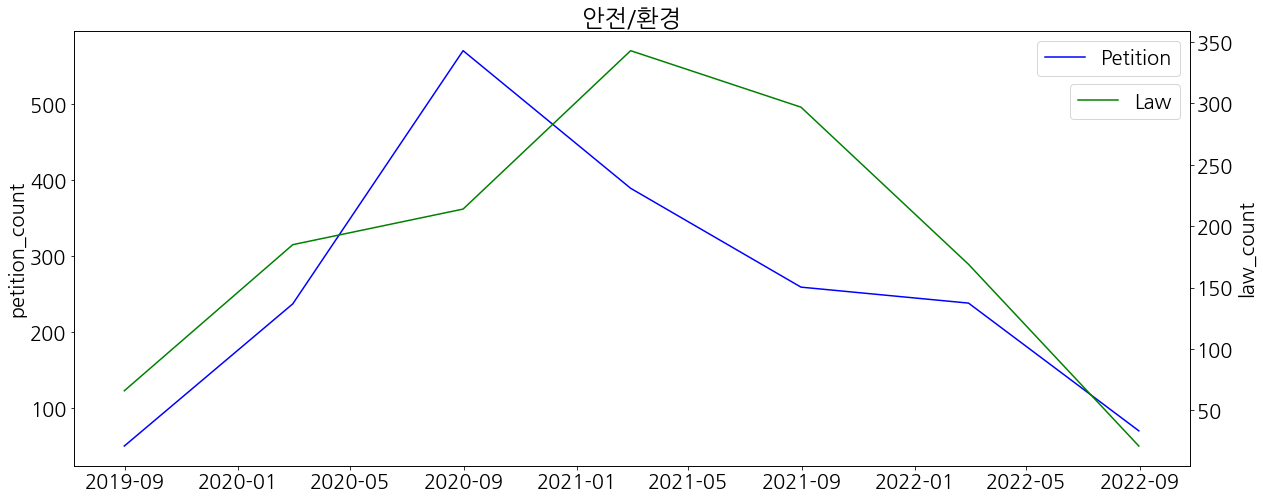

In [235]:
fig, ax1 = plt.subplots()

ax1.plot(petition_c.groupby(pd.Grouper(key='date_p',freq='6M')).sum(), label='Petition',color = 'b')

ax2 = ax1.twinx()
ax2.plot(work_L.groupby(pd.Grouper(key='date_l',freq='6M')).sum(), label='Law',color = 'g')

plt.title('안전/환경')
ax1.set_ylabel('petition_count')
ax2.set_ylabel('law_count')

ax1.legend(bbox_to_anchor=(1,1))
ax2.legend(bbox_to_anchor=(1,0.9))

# 회귀

In [236]:
petition_m = petition_c.groupby(pd.Grouper(key='date_p',freq='6M')).sum()
petition_m.reset_index(level=0, inplace=True)
petition_m.rename(columns = {'date_p' : 'date'}, inplace = True)
petition_m

,date,work_p
0,2019-08-31,50
1,2020-02-29,237
2,2020-08-31,570
3,2021-02-28,389
4,2021-08-31,259
5,2022-02-28,238
6,2022-08-31,70


In [237]:
law_m = work_L.groupby(pd.Grouper(key='date_l',freq='6M')).sum()
law_m.reset_index(level=0, inplace=True)
law_m.rename(columns = {'date_l' : 'date'}, inplace = True)
law_m

,date,work_l
0,2019-08-31,66
1,2020-02-29,185
2,2020-08-31,214
3,2021-02-28,343
4,2021-08-31,297
5,2022-02-28,169
6,2022-08-31,21


In [238]:
petition_law_join = pd.merge(petition_m,law_m,on='date',how='inner')
petition_law_join

,date,work_p,work_l
0,2019-08-31,50,66
1,2020-02-29,237,185
2,2020-08-31,570,214
3,2021-02-28,389,343
4,2021-08-31,259,297
5,2022-02-28,238,169
6,2022-08-31,70,21


Text(0, 0.5, 'law_count')

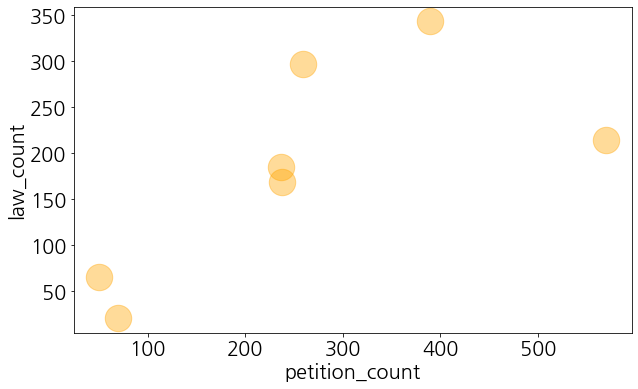

In [240]:
plt.rcParams["figure.figsize"] = [10,6]
plt.scatter(petition_law_join['work_p'],petition_law_join['work_l'],color='orange',s=700,alpha=0.4)
plt.xlabel('petition_count')
plt.ylabel('law_count')

In [241]:
import statsmodels.api as sm 
model = sm.OLS.from_formula("work_l ~ work_p", data = petition_law_join)
result = model.fit()
result.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 work_l   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     4.543
Date:                Tue, 07 Jun 2022   Prob (F-statistic):             0.0862
Time:                        15:14:50   Log-Likelihood:                -40.359
No. Observations:                   7   AIC:                             84.72
Df Residuals:                       5   BIC:                             84.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.4726     63.873      1.103      0.320     -93.719     234.664
work_p         0.4422      0.207      2.131      0.086      -0.091       0.975
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.884
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.482
Skew:                           0.187   Prob(JB):                        0.786
Kurtosis:                       1.770   Cond. No.                         569.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 전체로 해보자

In [75]:
work_l = laws.groupby('INITIATION DATE')['CONTENT'].count()
work_L = work_l.to_frame()
work_L.columns = ['work_l']
work_L = work_L.rename_axis('date_l').reset_index()
work_L

,date_l,work_l
0,2019-08-01,16
1,2019-08-02,13
2,2019-08-05,15
3,2019-08-06,18
4,2019-08-07,10
...,...,...
653,2022-04-29,16
654,2022-05-02,6
655,2022-05-03,11
656,2022-05-04,16


In [76]:
work = petition.groupby('end date')['title'].count()
petition_c = work.to_frame()
petition_c.columns = ['work_p']
petition_c = petition_c.rename_axis('date_p').reset_index()
petition_c

,date_p,work_p
0,2019-08-01,18
1,2019-08-02,11
2,2019-08-03,22
3,2019-08-04,28
4,2019-08-07,51
...,...,...
706,2022-04-29,20
707,2022-04-30,16
708,2022-05-01,9
709,2022-05-04,21


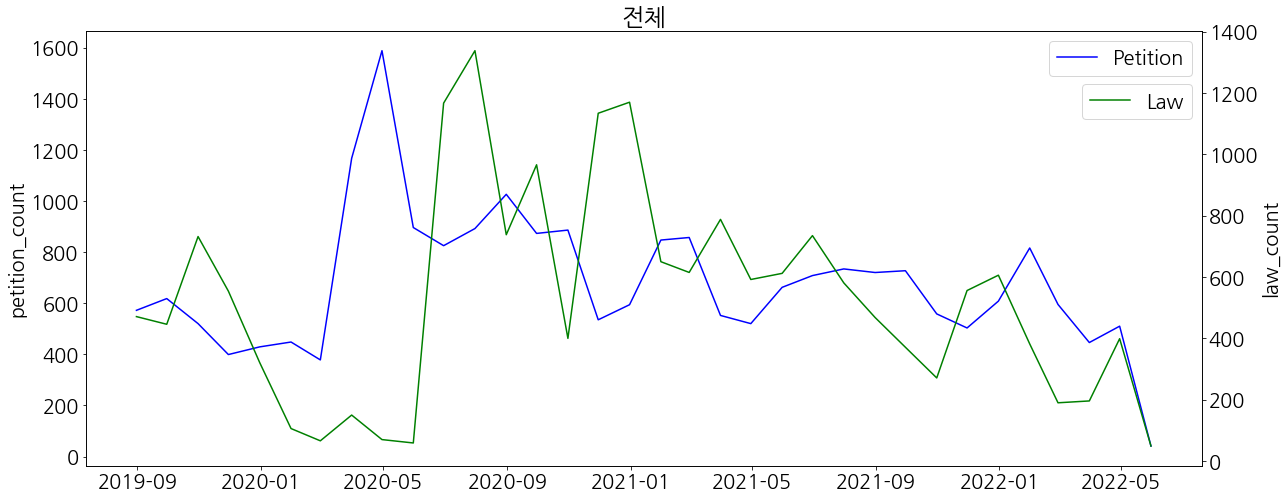

In [101]:
fig, ax1 = plt.subplots()

ax1.plot(petition_c.groupby(pd.Grouper(key='date_p',freq='1M')).sum(), label='Petition',color = 'b')

ax2 = ax1.twinx()
ax2.plot(work_L.groupby(pd.Grouper(key='date_l',freq='1M')).sum(), label='Law',color = 'g')

plt.title('전체')
ax1.set_ylabel('petition_count')
ax2.set_ylabel('law_count')

ax1.legend(bbox_to_anchor=(1,1))
ax2.legend(bbox_to_anchor=(1,0.9))

In [326]:
#전체 회귀돌리기
petition_m = petition_c.groupby(pd.Grouper(key='date_p',freq='1M')).sum()
petition_m.reset_index(level=0, inplace=True)
petition_m.rename(columns = {'date_p' : 'date'}, inplace = True)
petition_m

,date,work_p
0,2019-08-31,79
1,2019-09-30,76
2,2019-10-31,73
3,2019-11-30,58
4,2019-12-31,47
5,2020-01-31,48
6,2020-02-29,53
7,2020-03-31,124
8,2020-04-30,178
9,2020-05-31,104


In [322]:
law_m = work_L.groupby(pd.Grouper(key='date_l',freq='1M')).sum()
law_m.reset_index(level=0, inplace=True)
law_m.rename(columns = {'date_l' : 'date'}, inplace = True)
law_m

,date,work_l
0,2019-08-31,3
1,2019-09-30,1
2,2019-10-31,13
3,2019-11-30,3
4,2019-12-31,3
5,2020-01-31,0
6,2020-02-29,0
7,2020-03-31,0
8,2020-04-30,0
9,2020-05-31,0


In [327]:
petition_law_join = pd.merge(petition_m,law_m,on='date',how='inner')
petition_law_join

,date,work_p,work_l
0,2019-08-31,79,3
1,2019-09-30,76,1
2,2019-10-31,73,13
3,2019-11-30,58,3
4,2019-12-31,47,3
5,2020-01-31,48,0
6,2020-02-29,53,0
7,2020-03-31,124,0
8,2020-04-30,178,0
9,2020-05-31,104,0


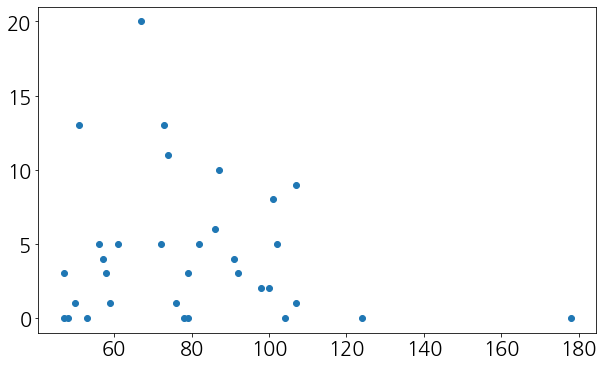

In [328]:
plt.scatter(petition_law_join['work_p'],petition_law_join['work_l'])

In [329]:
import statsmodels.api as sm 
model = sm.OLS.from_formula("work_l ~ work_p", data = petition_law_join)
result = model.fit()
result.summary()s

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 work_l   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.5720
Date:                Thu, 02 Jun 2022   Prob (F-statistic):              0.455
Time:                        15:37:23   Log-Likelihood:                -97.510
No. Observations:                  33   AIC:                             199.0
Df Residuals:                      31   BIC:                             202.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2089      2.617      2.373      0.024       0.872      11.545
work_p        -0.0234      0.031     -0.756      0.455      -0.087       0.040
==============================================================================
Omnibus:                       14.243   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.684
Skew:                           1.385   Prob(JB):                     0.000648
Kurtosis:                       4.734   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""